In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorboard as tb

In [23]:
# add the root dir to the path
import sys
sys.path.append('../')
log_dir_root = '../logs/'

In [24]:
import glob
from pathlib import Path

path = Path(log_dir_root)

# Get all the files in the directory with "tfevents" in their name
all_logs = list(path.glob('**/*tfevents*'))

In [25]:
def collect_log(prob_type, N):
    collected = []
    
    for _log in all_logs:
        if prob_type in str(_log) and f"N_{N}" in str(_log):
            collected.append(str(_log))
            
    return collected

In [26]:
target_logs = collect_log('cvrp', 100)
target_logs

['..\\logs\\pretrained_result\\cvrp\\N_100-B_64\\shared_mha-128-6-32-4-swiglu-10-0.0001\\1562-1-mean\\version_0\\events.out.tfevents.1702179058.wonjun.38324.0']

In [47]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def parse_log_as_df(prob_type, N):
    target_logs = collect_log(prob_type, N)
    result = {}
    for _log in target_logs:
        print(_log)
        event_acc = EventAccumulator(_log)
        _, _, _, _, _, model, baseline, _, _ = _log.split("\\")
        activation = model.split("-")[5]
        baseline = baseline.split("-")[-1]
        
        feat_nm = f"{activation}-{baseline}"
        
        result[feat_nm] = {'score': [], 'wall_time': []}
        
            
        event_acc.Reload()
        
        try:
            # E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
            scores = event_acc.Scalars('score/train_score_epoch')

            for i, item in enumerate(scores):
                result[feat_nm]['score'].append(item.value)
                result[feat_nm]['wall_time'].append(item.wall_time)
                
                
        except:
            print("No train score")
            continue
        
        print(result[feat_nm])
    result = pd.DataFrame.from_dict(result)
    return result

In [48]:
prob_type, N = 'tsp', 100
df = parse_log_as_df('tsp', N)
_ylim_table = {20: (3.83, 3.85), 50: (5.7, 6), 100: (7.8, 8.5)}
df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}")

..\logs\pretrained_result\tsp\N_100-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1688169839.IDSL-kwj.11108.10
{'score': [10.79153060913086, 8.753119468688965, 8.553173065185547, 8.477007865905762, 8.423059463500977, 8.377886772155762, 8.340234756469727, 8.307578086853027, 8.282803535461426, 8.25955867767334, 8.241333961486816, 8.227378845214844, 8.211135864257812, 8.198606491088867, 8.190642356872559, 8.17992115020752, 8.171113967895508, 8.163424491882324, 8.15715503692627, 8.149555206298828, 8.144950866699219, 8.136993408203125, 8.132586479187012, 8.128752708435059, 8.120471954345703, 8.1178617477417, 8.113241195678711, 8.109320640563965, 8.103902816772461, 8.101274490356445, 8.097113609313965, 8.094202995300293, 8.09012508392334, 8.087305068969727, 8.085162162780762, 8.082823753356934, 8.079765319824219, 8.077783584594727, 8.077438354492188, 8.074115753173828, 8.071550369262695, 8.067826271057129, 8.066910743713379, 8.064912796020508, 8.06378269

TypeError: no numeric data to plot

..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687580932.IDSL-kwj.11108.2
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687531739.IDSL-kwj.11108.0
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687605164.IDSL-kwj.11108.3
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687556032.IDSL-kwj.11108.1
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687757701.IDSL-kwj.11108.6
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687629957.IDSL-kwj.11108.4
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfeve

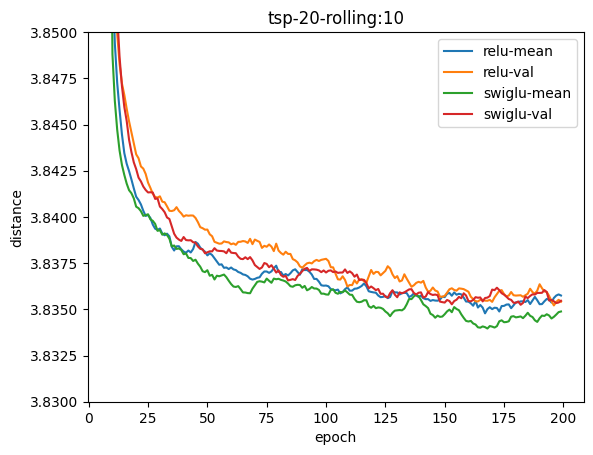

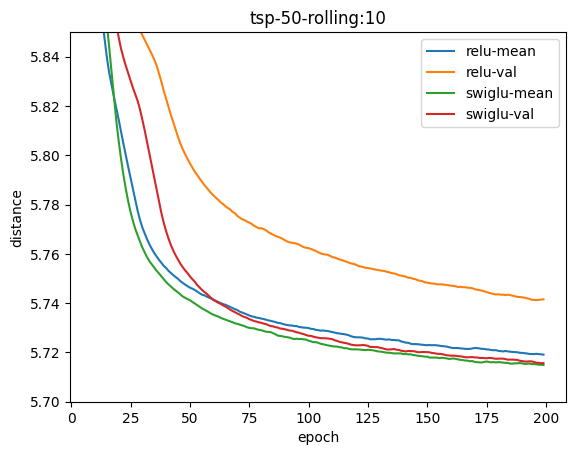

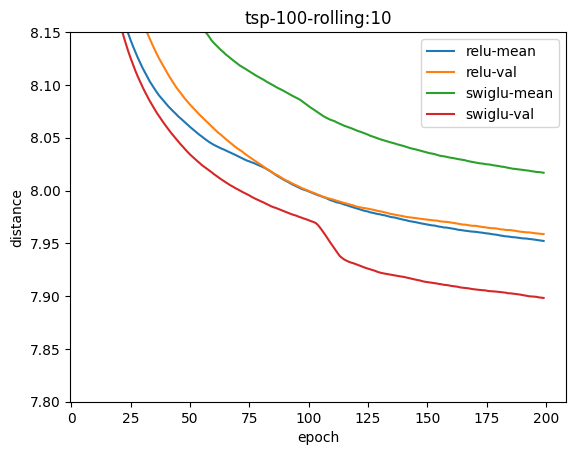

In [98]:
tsp_ylim_table = {20: (3.83, 3.85), 50: (5.7, 5.85), 100: (7.8, 8.15)}
rolling = 10

for prob_type in ['tsp']:
    
    if prob_type == 'tsp':
        _ylim_table = tsp_ylim_table
    
    for N in [20, 50, 100]:
        df = parse_log_as_df('tsp', N).rolling(rolling).mean()
        
        df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}-MA:{rolling}")
        

..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687580932.IDSL-kwj.11108.2
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687531739.IDSL-kwj.11108.0
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687605164.IDSL-kwj.11108.3
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687556032.IDSL-kwj.11108.1
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687757701.IDSL-kwj.11108.6
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687629957.IDSL-kwj.11108.4
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfeve

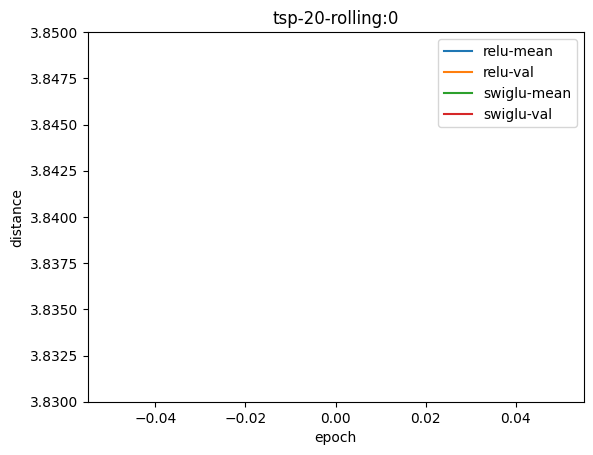

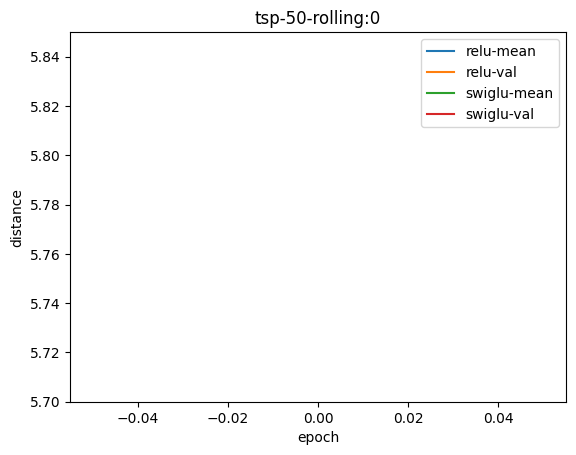

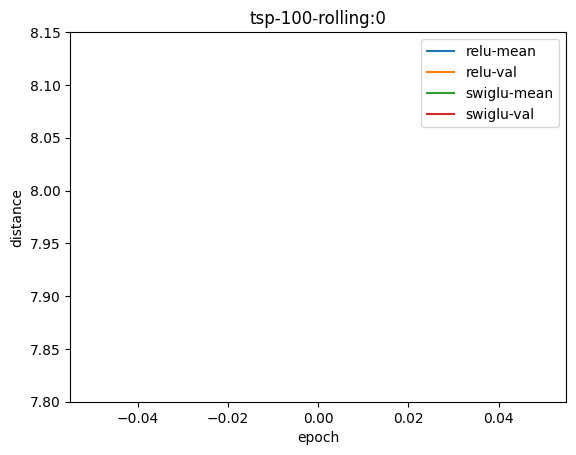

In [99]:
tsp_ylim_table = {20: (3.83, 3.85), 50: (5.7, 5.85), 100: (7.8, 8.15)}
rolling = 0

for prob_type in ['tsp']:
    
    if prob_type == 'tsp':
        _ylim_table = tsp_ylim_table
    
    for N in [20, 50, 100]:
        df = parse_log_as_df('tsp', N).rolling(rolling).mean()
        
        df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}-rolling:{rolling}")
        

In [91]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def parse_log_as_df(prob_type, N):
    target_logs = collect_log(prob_type, N)
    result = {}
    for _log in target_logs:
        print(_log)
        event_acc = EventAccumulator(_log)
        _, _, _, _, _, model, baseline, _, _ = _log.split("\\")
        activation = model.split("-")[5]
        baseline = baseline.split("-")[-1]
        
        feat_nm = f"{activation}-{baseline}"
        
        result[feat_nm] = {'distance': [], 'training time': []}
        
            
        event_acc.Reload()
        
        try:
            # E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
            scores = event_acc.Scalars('score/train_score_epoch')

            for i, item in enumerate(scores):
                result[feat_nm]['distance'].append(item.value)
                result[feat_nm]['training time'].append(item.wall_time)
                
                
        except:
            print("No train score")
            continue
        
        print(result[feat_nm])
    result = pd.DataFrame.from_dict(result[feat_nm])
    return result

..\logs\pretrained_result\cvrp\N_100-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1702179058.wonjun.38324.0
{'distance': [16.23821258544922, 16.22431182861328, 16.23569107055664, 16.23967742919922, 16.23077964782715, 16.230804443359375, 16.236602783203125, 16.222867965698242, 16.223711013793945, 16.218908309936523, 16.238100051879883, 16.225387573242188, 16.22793960571289, 16.230777740478516, 16.225568771362305, 16.228078842163086, 16.22907257080078, 16.224252700805664, 16.22726058959961, 16.23536491394043, 16.22679901123047, 16.235492706298828, 16.23418426513672, 16.217851638793945, 16.224700927734375, 16.233835220336914, 16.219913482666016, 16.237295150756836, 16.22896957397461, 16.234947204589844, 16.221778869628906, 16.230615615844727, 16.220327377319336, 16.23236846923828, 16.224712371826172, 16.220760345458984, 16.221250534057617, 16.214757919311523, 16.21706771850586, 16.219350814819336, 16.21445083618164, 16.227827072143555, 16.227468490

C:\Users\glist\AppData\Local\Temp\ipykernel_37664\1443975694.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)


[Text(1702170000.0, 0, '01:00'),
 Text(1702180000.0, 0, '03:46'),
 Text(1702190000.0, 0, '06:33'),
 Text(1702200000.0, 0, '09:20'),
 Text(1702210000.0, 0, '12:06'),
 Text(1702220000.0, 0, '14:53'),
 Text(1702230000.0, 0, '17:40'),
 Text(1702240000.0, 0, '20:26'),
 Text(1702250000.0, 0, '23:13'),
 Text(1702260000.0, 0, '02:00')]

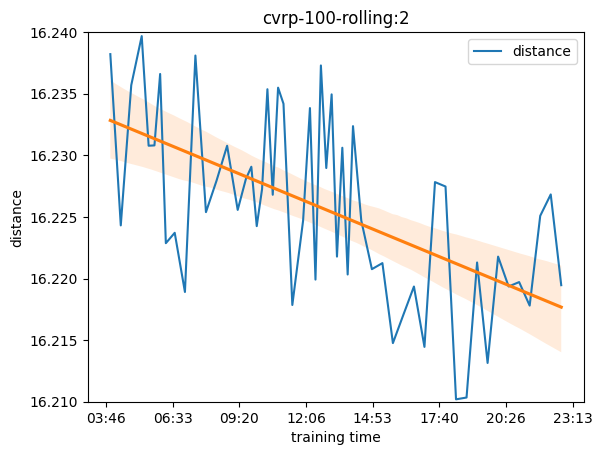

In [94]:
prob_type, N = 'cvrp', 100
rolling = 2

df = parse_log_as_df(prob_type, N)
df.index = df.index + 200
df['time'] = pd.to_datetime(df['training time'], unit='s')
# leave only the hour and minutes for the time
df['time'] = df['time'].dt.strftime('%H:%M')
_ylim_table = {20: (3.83, 3.85), 50: (5.7, 6), 100: (16.21, 16.24)}
# save the plot
ax = df.set_index('training time').plot(ylim=_ylim_table[N], xlabel="training time", ylabel="distance", title=f"{prob_type}-{N}-rolling:{rolling}")
# add a trend line to the plot by regressing the data
# for the seaborn, do not plot points on each observation
sns.regplot(x="training time", y="distance", data=df, ax=ax, scatter=False)

# for the label on the x-axis, convert the wall time to a string and leave only the hour and minutes
# get the current xtick labels
xticks = ax.get_xticks()
# convert the xticks to datetime
xticks = pd.to_datetime(xticks, unit='s')
# leave only the hour and minutes
xticks = xticks.strftime('%H:%M')
# set the xticks
ax.set_xticklabels(xticks)


In [95]:
fig = ax.get_figure()
fig.savefig(f"{prob_type}-{N}-rolling_{rolling}.png", dpi=300)